## Racing Bar Chart in Python with Matplotlib

In [ ]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

### Data
Reading the Stack Overflow tags dataset with pandas.

In [25]:
# Loading the dataset and selecting the top 10 tags for a year
df = pd.read_csv('C:/users/nisha/Desktop/by_tag_year.csv')
df_1 = df[df['year'] == 1500]
for i in range(2008,2019):
    k = df[df['year'].eq(i)].sort_values(by = 'number' , ascending = False).head(10)
    df_1 = pd.concat([df_1,k])
df = df_1

#### We have 4 columns in the dataset namely 'year', 'tag', 'number', 'year_total'. 

In [26]:
df.head()

,year,tag,number,year_total
255,2008,c#,7473,58390
1,2008,.net,5910,58390
1131,2008,java,4315,58390
122,2008,asp.net,3789,58390
259,2008,c++,3111,58390


##### Typically, a tag is mapped to a group and each group is further mapped to a colour.

In [5]:
# Mapping the languages/frameworks with the appropriate group.
tags = ['javascript','sql','c++','angular','java','php','.net','jquery','iphone','asp.net',
        'sql-server','python','html','android','c#','css','ios']
Groups = ['Programming Language' , 'Programming Language' , 'Programming Language' , 'Framework' , 
          'Programming Language' , 'Programming Language'  , 'Framework' ,'Library' , 
          'Operating System' , 'Framework' ,'RDMS' , 'Programming Language' ,  'Markup Language'  , 
          'Operating System' , 'Programming Language' , 'Markup Language' , 'Operating System' ]
tags_groups = dict(zip(tags , Groups))

# Adding the Group column to the dataframe
df['Group'] = df['tag'].apply(lambda x : tags_groups[x])

In [6]:
# Inspecting the dataset
df.head()

,year,tag,number,year_total,Group
255,2008,c#,7473,58390,Programming Language
1,2008,.net,5910,58390,Framework
1131,2008,java,4315,58390,Programming Language
122,2008,asp.net,3789,58390,Framework
259,2008,c++,3111,58390,Programming Language


In [7]:
# Mapping the groups with the colors
colors = dict(zip(['Operating System', 'Markup Language', 'Programming Language', 'Framework','RDMS', 'Library'],
    ['#adb0ff', '#ffb3ff', '#90d595','#aafbff', '#f7bb5f', '#eafb50']))

### Function to create a coloured bar chart 

In [9]:
def draw_barchart(year):
    
    # Creating a dataframe for each year    
    dff = df[df['year'].eq(year)].sort_values(by='number', ascending=False).head(10)[::-1]
    ax.clear()

    # Pass colors values to `color=`    
    ax.barh(dff['tag'], dff['number'], color=[colors[tags_groups[x]] for x in dff['tag']])
    dx = dff['number'].max() / 200

    # Iterate over the values to plot labels and values (python , programming language , nmuber of questions)
    for i, (number, tag) in enumerate(zip(dff['number'], dff['tag'])):
        ax.text(number-dx, i,     tag, size=14 , weight=600 , ha='right' , va = 'bottom')  # Python : tag
        ax.text(number-dx, i-0.25, tags_groups[tag], size = 10 , color='#444444', ha='right', va='baseline') # Prog_lang : group
        ax.text(number+dx, i,     f'{number:,.0f}',  size=14, ha='left',  va='center')   # 107348 : number

    # Add year to the middle right portion of canvas
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)

    # Polishing the styles
    
    # Update font sizes, color, orientation of the text  
    ax.text(0, 1.06, 'No of questions', transform=ax.transAxes, size=12, color='#777777')
    
    # Move X-axis to top, add color & subtitle
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0.1, 0.01)
    
    # Adding grid lines behind bars
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    
    # Adding title, credits, gutter space
    ax.text(0, 1.1, 'The most popular tags on Stack Overflow from 2008 to 2018',
                transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @rishabh_bansal', transform=ax.transAxes, ha='right',size=14,
                color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    
    # Removing box frame
    plt.box(False)    

### Animation

To animate, we will use FuncAnimation from matplotlib.animation.

FuncAnimation makes an animation by repeatedly calling a function (that draws on canvas). In our case, it'll be draw_barchart.

Frames arguments accepts on what values we want to run draw_barchart -- we'll run from year 2008 to 2018.

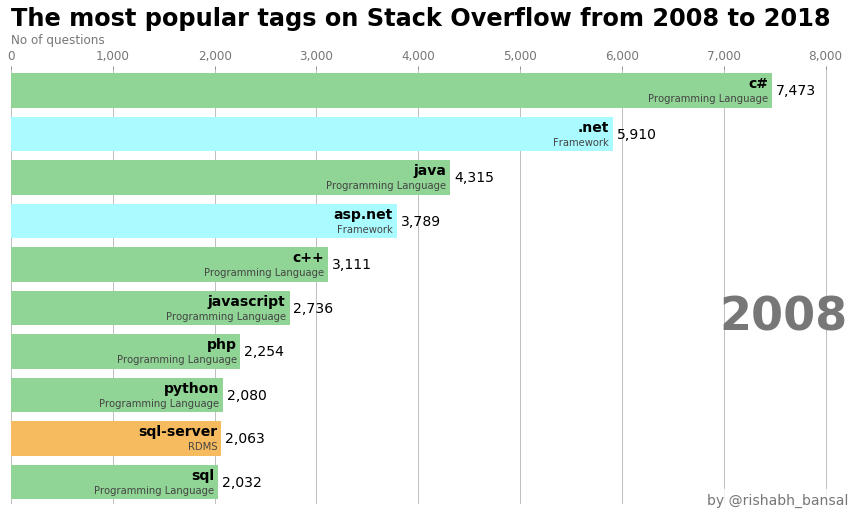

In [28]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig , draw_barchart, frames=range(2008, 2019) , interval = 1000)
html = animator.to_html5_video()
HTML(html)